In [1]:
import numpy as np;
from sporco import util, plot;
import cv2;

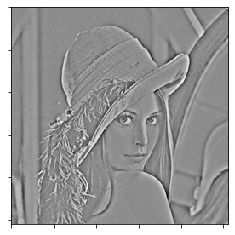

In [46]:
img = cv2.imread("./LENNA.bmp", 0);
npd = 16;
fltlmbd = 5;
sl, sh = util.tikhonov_filter(np.float64(img), fltlmbd, npd);
plot.imview(sh);

In [47]:
img1, img2 = np.zeros((512, 512)), np.zeros((512, 512));

In [48]:
img1[0:256, 0:256] = img;
img2[512-256:, 512-256:] = img;

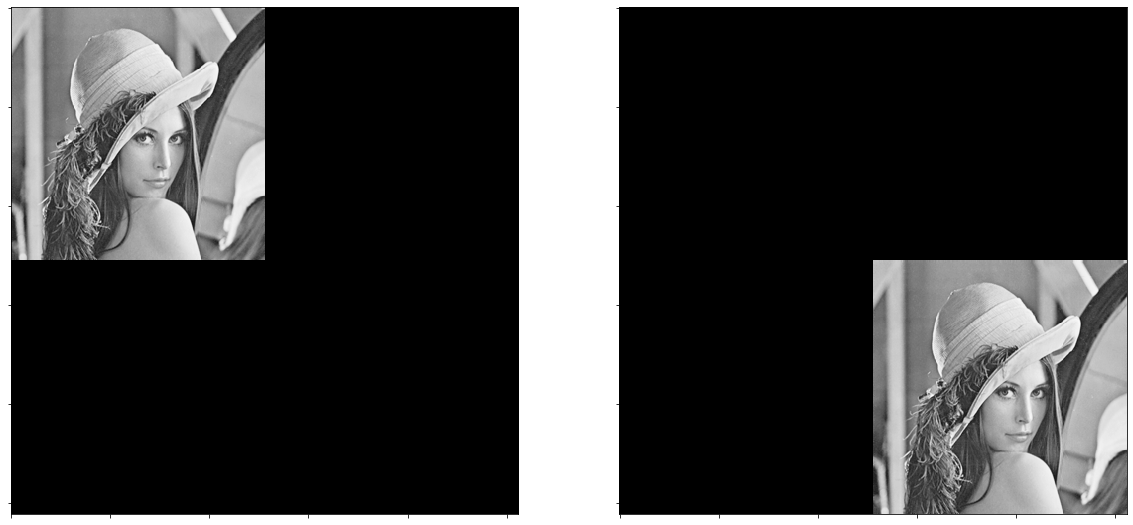

In [49]:
fig = plot.figure(figsize=(20, 10));
ax1 = fig.add_subplot(121);
ax2 = fig.add_subplot(122);
plot.imview(img1, ax = ax1, fig = fig);
plot.imview(img2, ax = ax2, fig = fig);

In [50]:
def power_spectrum(img):
    return np.log10(np.abs(np.fft.fftshift(np.fft.fft2(img))));

(<Figure size 2160x720 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x217e3c20708>)

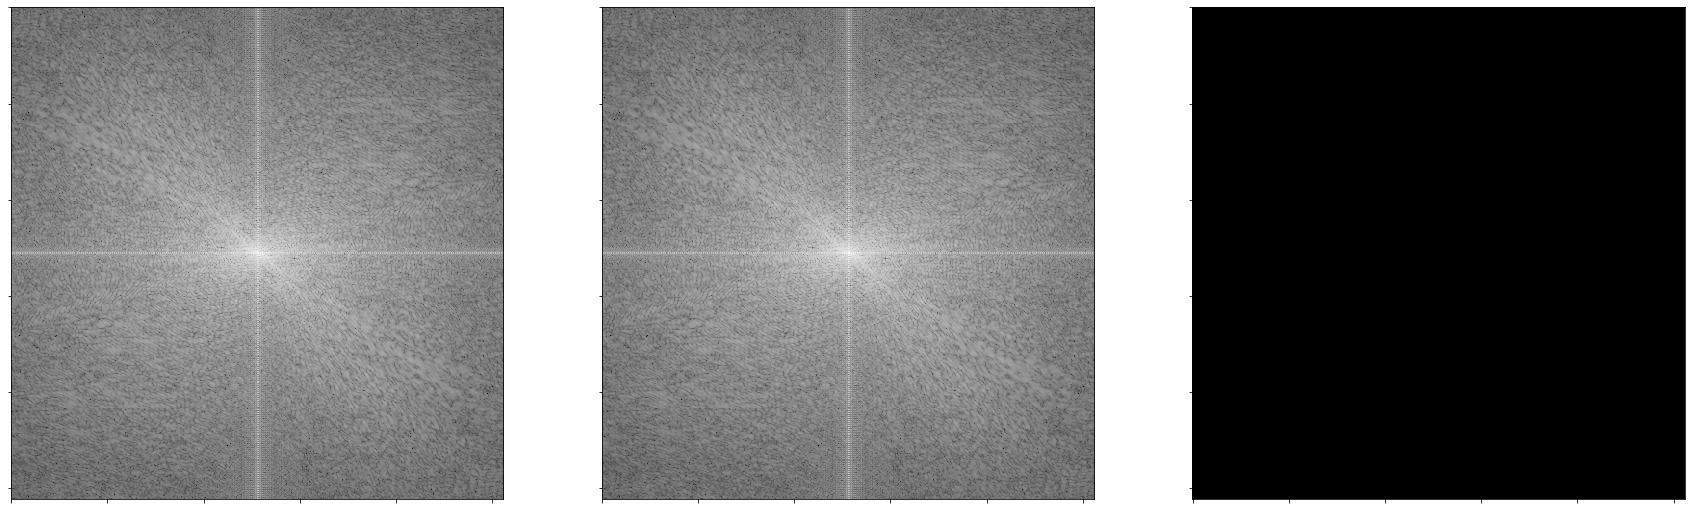

In [52]:
fig = plot.figure(figsize=(30, 10));
ax1 = fig.add_subplot(131);
ax2 = fig.add_subplot(132);
ax3 = fig.add_subplot(133);
plot.imview(power_spectrum(img1), ax = ax1, fig = fig);
plot.imview(power_spectrum(img2), ax = ax2, fig = fig);
plot.imview(np.abs(power_spectrum(img1)-power_spectrum(img2)), ax = ax3, fig = fig)

In [12]:
from sporco.dictlrn import cbpdndl

In [27]:
np.random.seed(12345)
D0 = np.random.randn(32, 32, 16)

In [30]:
lmbda = 0.2
opt = cbpdndl.ConvBPDNDictLearn.Options({'Verbose': True, 'MaxMainIter': 400,
                            'CBPDN': {'rho': 50.0*lmbda + 0.5},
                            'CCMOD': {'rho': 10.0, 'ZeroMean': True}},
                            dmethod='cns')


In [31]:
d = cbpdndl.ConvBPDNDictLearn(D0, np.float32(np.expand_dims(sh, -1)), lmbda, opt, dmethod='cns')
D1 = d.solve()
print("ConvBPDNDictLearn solve time: %.2fs" % d.timer.elapsed('solve'))

Itn   Fnc       DFid      ℓ1        Cnstr     r_X       s_X       ρ_X       r_D       s_D       ρ_D     
--------------------------------------------------------------------------------------------------------
   0  1.38e+06  1.30e+06  4.40e+05  1.30e-06  4.37e-01  5.45e+01  1.05e+01  1.21e-01  6.75e-01  1.00e+01
   1  1.54e+05  6.81e+03  7.37e+05  7.89e-07  4.26e-02  5.08e+00  1.05e+01  8.77e-02  6.00e-01  1.00e+01
   2  1.49e+05  6.95e+03  7.08e+05  1.35e-06  3.14e-02  3.74e+00  1.05e+01  6.37e-02  2.20e-01  1.00e+01
   3  1.46e+05  4.93e+03  7.07e+05  7.76e-07  2.21e-02  2.66e+00  1.05e+01  6.28e-02  1.32e-01  1.00e+01
   4  1.45e+05  4.15e+03  7.05e+05  1.17e-06  1.77e-02  2.14e+00  1.05e+01  6.47e-02  9.56e-02  1.00e+01
   5  1.41e+05  1.93e+03  6.98e+05  1.05e-06  1.59e-02  1.93e+00  1.05e+01  6.41e-02  7.59e-02  1.00e+01
   6  1.39e+05  1.89e+03  6.87e+05  1.65e-06  1.39e-02  1.68e+00  1.05e+01  6.96e-02  7.22e-02  1.00e+01
   7  1.39e+05  2.95e+03  6.79e+05  1.33e-06  1.70e-02 

C:\Users\s5322\Anaconda3\envs\tom\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


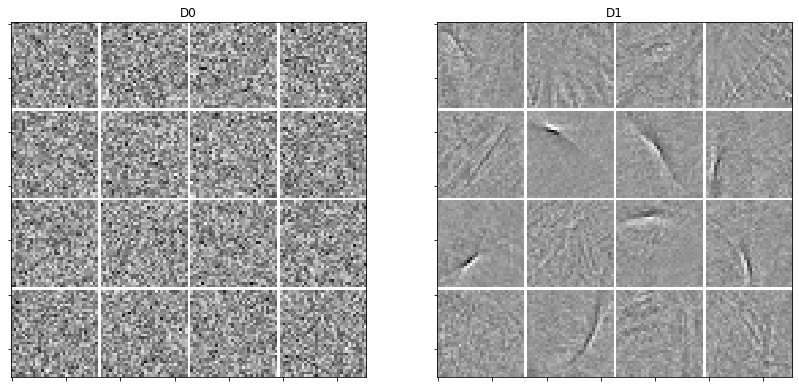

In [32]:
D1 = D1.squeeze()
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), title='D0', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1), title='D1', fig=fig)
fig.show()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x217e2226cc8>)

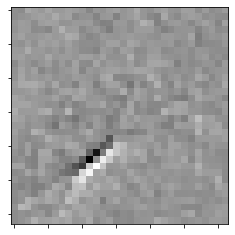

In [36]:
plot.imview(D1[:, :, 8])#5, 6, 8

In [38]:
X = d.getcoef().squeeze();

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x217e290d108>)

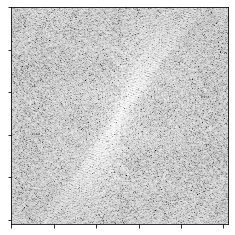

In [45]:
plot.imview(power_spectrum(X[:, :, 5]))

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

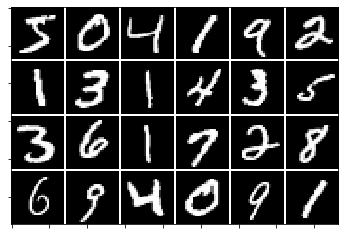

In [11]:
train_images.shape
imgs = train_images[0:24].transpose(1, 2, 0);
plot.imview(util.tiledict(imgs));
plot.savefig("./mnist_sample.png", dpi=300, bbox_inches="tight", pad_inches=0.0)

## 